In [1]:
#Import dependencies
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#create variables equal to the csv files
city_data = "Pyber_data_city_data.csv"
ride_data = "Pyber_data_ride_data.csv"
#read the csv files
cities = pd.read_csv(city_data)
rides = pd.read_csv(ride_data)


In [3]:
rides.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344


In [4]:
cities.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [15]:
#Combine the data into a single data set
combined_pyber_data = pd.merge(cities, rides, how='outer', on='city')
combined_pyber_data.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [11]:
#Create variables that break down and group the dataset by city type
rural_data = combined_pyber_data[combined_pyber_data["type"] == "Rural"]
suburb_data = combined_pyber_data[combined_pyber_data["type"] == "Suburban"]
urban_data = combined_pyber_data[combined_pyber_data["type"] == "Urban"]

In [12]:
#create variables to hold the calculations of average ride fare by city type
#these will be the y-axis
average_fare_rural = rural_data.groupby("city")["fare"].mean()
average_fare_suburb = suburb_data.groupby("city")["fare"].mean()
average_fare_urban = urban_data.groupby("city")["fare"].mean()

In [13]:
#create variables to hold the calculations of total number of rides per city
#these will be the x-axis
rural_ride_count = rural_data.groupby("city").count()["ride_id"]
suburb_ride_count = suburb_data.groupby("city").count()["ride_id"]
urban_ride_count = urban_data.groupby("city").count()["ride_id"]

# Scatter Plot of Ride Sharing Data

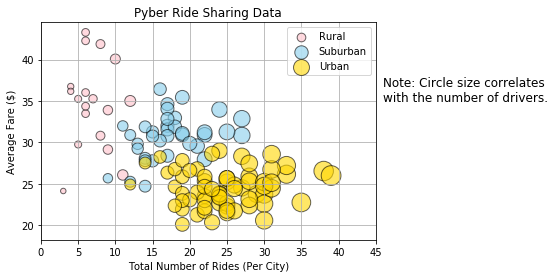

In [70]:
#create the scatter plots using the plt.scatter method and the variables we have created
#rural scatter plot
rural_graph = plt.scatter(rural_ride_count, average_fare_rural, s=10*rural_ride_count, c="pink", linewidths=1, marker='o', edgecolor='black', alpha=0.6, label="Rural")
#suburban scatter plot
suburban_graph = plt.scatter(suburb_ride_count, average_fare_suburb, s=10*suburb_ride_count, c="skyblue", linewidths=1, marker='o', edgecolor='black', alpha=0.6, label="Suburban")
#urban scatter plot
urban_graph = plt.scatter(urban_ride_count, average_fare_urban, s=10*urban_ride_count, c="gold", linewidths=1, marker='o', edgecolor="black", alpha=0.6, label="Urban")
#Set Plot Title, x and y label, range of x-axis, create grid pattern, create legend, create note
plt.title("Pyber Ride Sharing Data")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.xlim((0,45))
plt.grid(True)
plt.legend()
plt.text(46, 35, "Note: Circle size correlates \nwith the number of drivers.", fontsize=12)

#Save Figure
plt.savefig("scatterplot.png")
#Show Plot
plt.show()
     

# Percentage of Total Fares By City Type

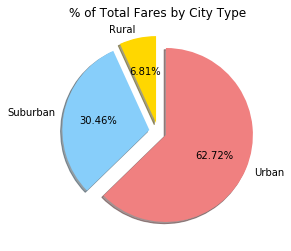

In [62]:
# Create variable equal to calculate of percentage of total fares by city type
fares_percent = combined_pyber_data.groupby("type").sum()["fare"]/combined_pyber_data["fare"].sum()*100
# Create Pie Chart - set parameters
plt.pie(fares_percent,
        labels=["Rural", "Suburban", "Urban"],
        colors=["gold", "lightskyblue", "lightcoral"],
        explode=[.1, .1, 0.1],
        autopct='%.2f%%',
        shadow=True,
        startangle=90
       )

plt.title("% of Total Fares by City Type")
#Save Figure
plt.savefig("fares_percent.png")
#Show Plot
plt.show()


# Percentage of Total Rides By City Type

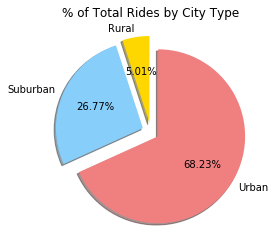

In [61]:
# Create variable equal to calculate of percentage of total rides by city type
rides_percent = combined_pyber_data.groupby("type").sum()["ride_id"]/combined_pyber_data["ride_id"].sum()*100
# Create Pie Chart - set parameters
plt.pie(rides_percent,
        labels=["Rural", "Suburban", "Urban"],
        colors=["gold", "lightskyblue", "lightcoral"],
        explode=[.1, .1, 0.1],
        autopct='%.2f%%',
        shadow=True,
        startangle=90
       )

plt.title("% of Total Rides by City Type")
#Save Figure
plt.savefig("rides_percent.png")
#Show Plot
plt.show()

# Percentage of Total Drivers By City Type


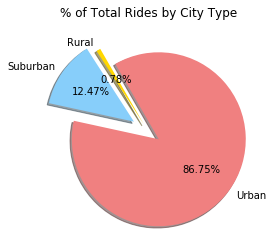

In [67]:
# Create variable equal to calculate of percentage of total drivers by city type
# Create variable equal to calculate of percentage of total rides by city type
drivers_percent = combined_pyber_data.groupby("type").sum()["driver_count"]/combined_pyber_data["driver_count"].sum()*100
# Create Pie Chart - set parameters
plt.pie(drivers_percent,
        labels=["Rural", "Suburban", "Urban"],
        colors=["gold", "lightskyblue", "lightcoral"],
        explode=[.1, .2, 0.15],
        autopct='%.2f%%',
        shadow=True,
        startangle=120
       )

plt.title("% of Total Rides by City Type")
#Save Figure
plt.savefig("drivers_percent.png")
#Show Plot
plt.show()